In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/calls.csv')

In [3]:
df['year'] = df['date'].str[:4]
df['month'] = df['date'].str[5:7]
df.sample(4)

,date,province,calls,year,month
40870,2024-09-15,Salerno,6.0,2024,09
37321,2023-11-18,Lucca,1.0,2023,11
3337,2013-10-28,Genova,5.0,2013,10
2595,2013-08-26,Ascoli Piceno,1.0,2013,08


In [4]:
calls_by_month = df.groupby(['year', 'month'])['calls'].sum().reset_index()
calls_by_month

,year,month,calls
0,2013,01,1120.0
1,2013,02,1164.0
2,2013,03,1216.0
3,2013,04,856.0
4,2013,05,1558.0
...,...,...,...
137,2024,06,1276.0
138,2024,07,1108.0
139,2024,08,1001.0
140,2024,09,1549.0


In [10]:
# Create ordered data
monthly_calls = df.groupby('month')['calls'].sum()

monthly_calls

month
01    10275.0
02     9702.0
03    11356.0
04    12721.0
05    11410.0
06    12683.0
07    12234.0
08    10032.0
09    12542.0
10     8769.0
11     8430.0
12    16011.0
Name: calls, dtype: float64

/var/folders/m0/g7ky_r7x67l1pv2zgg_fptx80000gn/T/ipykernel_33471/443051138.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')  # Cleaner base style


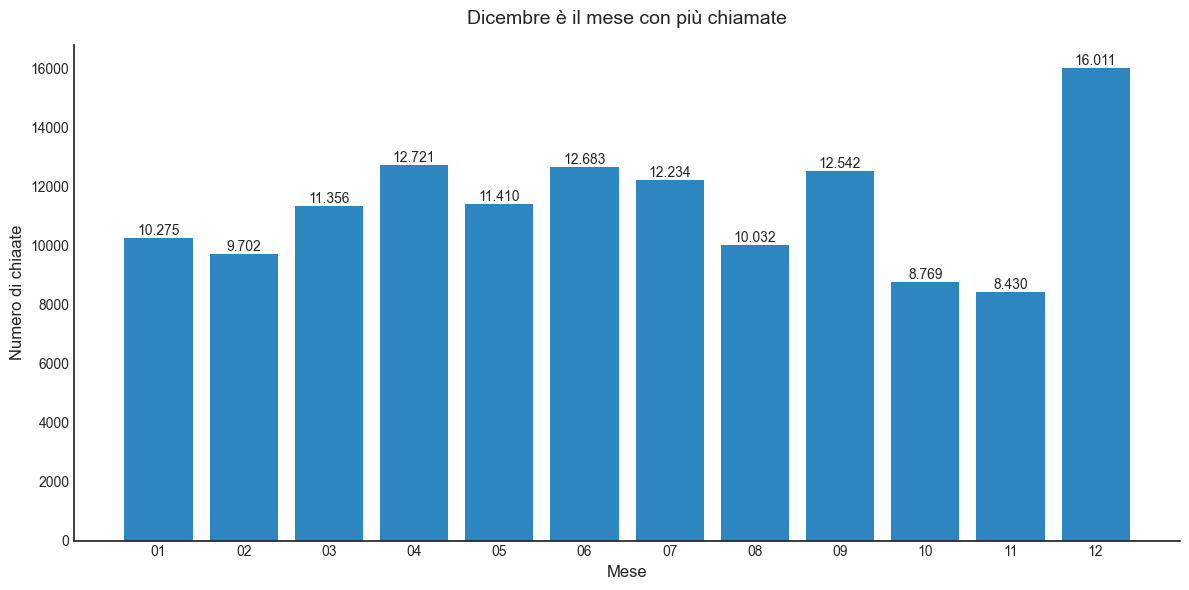

In [6]:
# Set style and figure size
plt.style.use('seaborn-white')  # Cleaner base style
plt.figure(figsize=(12, 6))


# Create bar plot
bars = plt.bar(monthly_calls.index, monthly_calls.values, color='#2E86C1')

# Customize plot
plt.title('Dicembre è il mese con più chiamate', fontsize=14, pad=15)
plt.xlabel('Mese', fontsize=12)
plt.ylabel('Numero di chiaate', fontsize=12)

# Remove grid and spines
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add value labels
for bar in bars:
   height = bar.get_height()
   plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}'.replace(',', '.'),
            ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

plt.show()

In [13]:
#Calculate percentages
calls_by_month['percentage'] = calls_by_month.groupby('year')['calls'].transform(lambda x: (x / x.sum()) * 100)
calls_by_month

,year,month,calls,percentage
0,2013,01,1120.0,7.221148
1,2013,02,1164.0,7.504836
2,2013,03,1216.0,7.840103
3,2013,04,856.0,5.519020
4,2013,05,1558.0,10.045132
...,...,...,...,...
137,2024,06,1276.0,10.750695
138,2024,07,1108.0,9.335243
139,2024,08,1001.0,8.433735
140,2024,09,1549.0,13.050805


In [14]:
# Group by month and sum percentages
monthly_total_percentages = calls_by_month.groupby('month')['percentage'].sum()
monthly_total_percentages

month
01     93.263021
02     86.323689
03    100.724411
04    110.612180
05     97.467367
06    109.580244
07    106.409581
08     88.894322
09    111.180544
10     78.311757
11     75.378923
12    141.853960
Name: percentage, dtype: float64

Righe duplicate:
Empty DataFrame
Columns: [year, month, count]
Index: []


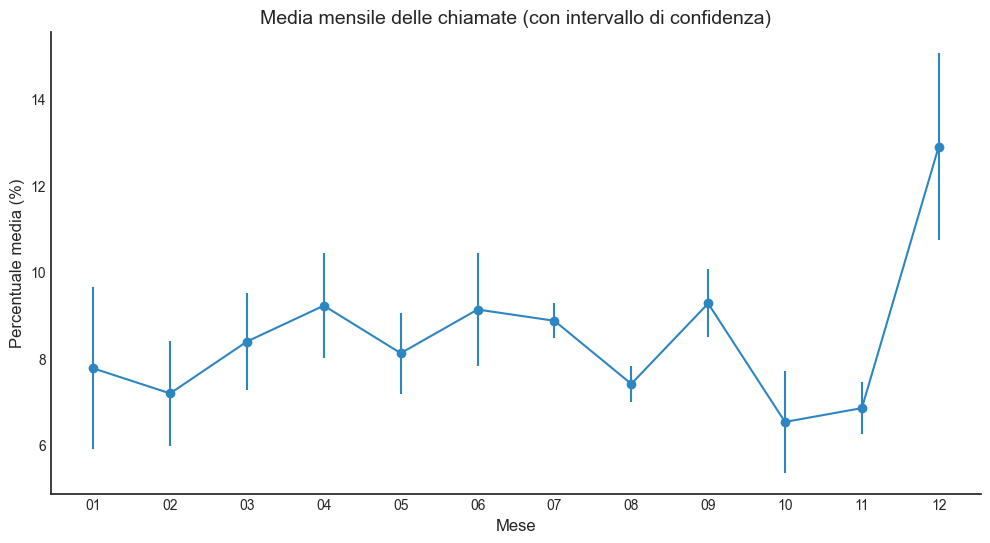

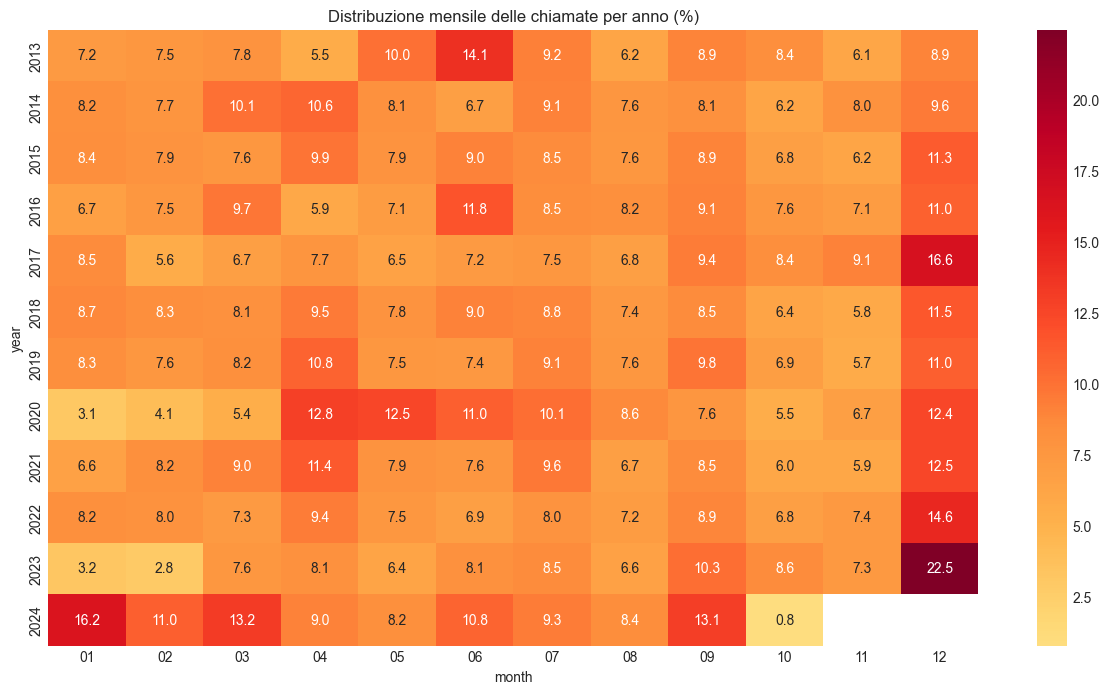

In [15]:
# 1. Average monthly percentages with confidence intervals
monthly_stats = calls_by_month.groupby('month')['percentage'].agg(['mean', 'std']).round(2)
monthly_stats['ci'] = 1.96 * monthly_stats['std'] / np.sqrt(len(calls_by_month['year'].unique()))

# Plot with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(monthly_stats.index, monthly_stats['mean'], 
           yerr=monthly_stats['ci'], fmt='o-', color='#2E86C1')

plt.title('Media mensile delle chiamate (con intervallo di confidenza)', fontsize=14)
plt.xlabel('Mese', fontsize=12)
plt.ylabel('Percentuale media (%)', fontsize=12)
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig('../images/media_mensile.png', dpi=300, bbox_inches='tight')

# 2. Heatmap showing yearly patterns
plt.figure(figsize=(15, 8))
# Prima di fare il pivot, verifichiamo se ci sono duplicati
duplicates = calls_by_month.groupby(['year', 'month']).size().reset_index(name='count')
duplicates = duplicates[duplicates['count'] > 1]

print("Righe duplicate:")
print(duplicates)

# Risolviamo aggregando i dati prima del pivot
df_agg = calls_by_month.groupby(['year', 'month'])['percentage'].mean().reset_index()

# Ora creiamo il pivot
pivot_df = df_agg.pivot(index='year', columns='month', values='percentage')

sns.heatmap(pivot_df, cmap='YlOrRd', annot=True, fmt='.1f', 
           center=pivot_df.mean().mean())
           
plt.title('Distribuzione mensile delle chiamate per anno (%)')
plt.savefig('../images/heatmap_mensile.png', dpi=300, bbox_inches='tight')
plt.show()